In [1]:
#install packages
import numpy as np
import pandas as pd
import seaborn as sns

#load data
complaints_inquiries= pd.read_csv('/Users/aren_kab/Documents/Job Search/BIC Data Analyst /explorationdatasets/BIC_Complaints_Inquiries.csv', parse_dates=['DATE COMPLAINT/INQUIRY REPORTED ON'])

In [2]:
complaints_inquiries.head()

,COMPLAINT/INQUIRY NUMBER,LICENSE TYPE,ACCOUNT NAME,BIC NUMBER,DATE COMPLAINT/INQUIRY REPORTED ON,INDUSTRY TYPE,ACCOUNT STATUS,SOURCE OF COMPLAINT/INQUIRY,COMPLAINT/INQUIRY DISPOSITION,COMPLAINT/INQUIRY STATUS,...,EXPORT DATE,Borough,Latitude,Longitide,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,COMP-193716,NaN,NaN,NaN,2017-10-26,Trade Waste,NaN,MAIL,Referred to Another Agency,Closed,...,2022-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-00210,NaN,NaN,TWC-NaN,NaT,Trade Waste,NaN,PHONE - 6300,Referred To BIC Legal,Closed,...,2022-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-00382,NaN,NaN,TWC-1059,NaT,Trade Waste,NaN,311/PHONE - 9278,Resolved,Closed,...,2022-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01226,NaN,T. I. A. OF NEW YORK INC.,TWC-1157,NaT,Trade Waste,NaN,311/PHONE - 9278,Resolved,Closed,...,2022-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-01530,NaN,NaN,TWC-0,NaT,Trade Waste,NaN,MAIL,Violation Written,Closed,...,2022-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#basic info
complaints_inquiries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   COMPLAINT/INQUIRY NUMBER            17800 non-null  object        
 1   LICENSE TYPE                        2126 non-null   object        
 2   ACCOUNT NAME                        5088 non-null   object        
 3   BIC NUMBER                          12255 non-null  object        
 4   DATE COMPLAINT/INQUIRY REPORTED ON  5978 non-null   datetime64[ns]
 5   INDUSTRY TYPE                       17800 non-null  object        
 6   ACCOUNT STATUS                      2454 non-null   object        
 7   SOURCE OF COMPLAINT/INQUIRY         17788 non-null  object        
 8   COMPLAINT/INQUIRY DISPOSITION       17141 non-null  object        
 9   COMPLAINT/INQUIRY STATUS            17670 non-null  object        
 10  TOTAL RESPONSE TIME   

In [4]:
#summerize table
complaints_inquiries.describe()

,TOTAL RESPONSE TIME,VEHICLE YEAR,Latitude,Longitide,Community Board,Council District,Census Tract,BIN,BBL
count,5934.000000,22.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2.169000e+03,2.169000e+03
mean,3.599933,2008.409091,40.717668,-73.934126,6.846501,23.660948,6591.396388,2.826592e+06,2.744639e+09
std,12.141854,7.829487,0.075642,0.085804,5.420769,15.878837,21603.565875,1.344248e+06,1.301213e+09
min,-12.000000,1995.000000,40.504310,-74.248905,1.000000,1.000000,1.000000,1.000000e+06,1.000078e+09
25%,0.000000,2002.000000,40.672087,-73.987604,3.000000,7.000000,99.000000,1.081179e+06,1.016610e+09
50%,1.000000,2007.500000,40.724531,-73.946977,6.000000,25.000000,284.000000,3.095946e+06,3.029200e+09
75%,4.000000,2016.000000,40.761655,-73.882347,10.000000,37.000000,751.500000,4.061724e+06,4.018470e+09
max,539.000000,2020.000000,40.908233,-73.706590,83.000000,51.000000,157903.000000,5.163345e+06,5.080420e+09


### Getting Started Questions
#### What percent of complaints came through 311 in a certain period of time?
#### What was the average total response time of complaints in a certain period of time?
#### What are the top three sources of an inquiry?  

In [5]:
#Getting Started Questions to familiarize with data- Keep rows neccessary 
complaints_inquiries_gs = complaints_inquiries.iloc[:, [1, 2,4,7,10,31,32,33]]
complaints_inquiries_gs.head()

,LICENSE TYPE,ACCOUNT NAME,DATE COMPLAINT/INQUIRY REPORTED ON,SOURCE OF COMPLAINT/INQUIRY,TOTAL RESPONSE TIME,METHOD USED TO CONTACT COMPLAINANT,EXPORT DATE,Borough
0,NaN,NaN,2017-10-26,MAIL,0.0,Letter,2022-12-12,NaN
1,NaN,NaN,NaT,PHONE - 6300,NaN,NaN,2022-12-12,NaN
2,NaN,NaN,NaT,311/PHONE - 9278,NaN,NaN,2022-12-12,NaN
3,NaN,T. I. A. OF NEW YORK INC.,NaT,311/PHONE - 9278,NaN,NaN,2022-12-12,NaN
4,NaN,NaN,NaT,MAIL,NaN,NaN,2022-12-12,NaN


In [6]:
complaints_inquiries_gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   LICENSE TYPE                        2126 non-null   object        
 1   ACCOUNT NAME                        5088 non-null   object        
 2   DATE COMPLAINT/INQUIRY REPORTED ON  5978 non-null   datetime64[ns]
 3   SOURCE OF COMPLAINT/INQUIRY         17788 non-null  object        
 4   TOTAL RESPONSE TIME                 5934 non-null   float64       
 5   METHOD USED TO CONTACT COMPLAINANT  4548 non-null   object        
 6   EXPORT DATE                         17800 non-null  object        
 7   Borough                             2215 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 1.1+ MB


In [7]:
#Check the date range - 
print(complaints_inquiries_gs['DATE COMPLAINT/INQUIRY REPORTED ON'].max())
print(complaints_inquiries_gs['DATE COMPLAINT/INQUIRY REPORTED ON'].min())

2022-12-08 00:00:00
2006-10-16 00:00:00


In [8]:
#lets use 2019 -2021 data to get a clean 3 years
complaints19_21 = complaints_inquiries_gs.loc[(complaints_inquiries_gs['DATE COMPLAINT/INQUIRY REPORTED ON'] >= '2019-01-01')
                     & (complaints_inquiries_gs['DATE COMPLAINT/INQUIRY REPORTED ON'] < '2022-01-01')]

Text(0, 0.5, "Total Count of complaints 19'-21'")

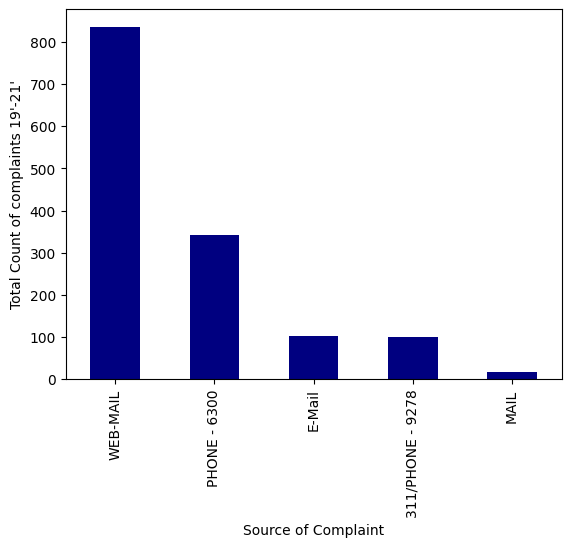

In [9]:
# Let's look at the number of complaints sources for the top 5
import matplotlib.pyplot as plt
complaints19_21['SOURCE OF COMPLAINT/INQUIRY'].value_counts().head().plot(kind='bar', color = 'navy')
plt.xlabel("Source of Complaint")
plt.ylabel("Total Count of complaints 19'-21'")

#### Q3: The top 3 sources of an inquiry are Web-Mail, Phone, and E-mail


In [10]:
#FOR THE PAST Three years Value for 311
Percent_311= (len(complaints19_21[complaints19_21['SOURCE OF COMPLAINT/INQUIRY']=='311/PHONE - 9278'])/complaints19_21['SOURCE OF COMPLAINT/INQUIRY'].count()*100)

In [11]:
print('Q1:',Percent_311.round(2), "% of complaints came through 311 from 2019-2021")

Q1: 6.89 % of complaints came through 311 from 2019-2021


In [12]:
#Let's Solve for avg response time
complaints19_21.head(2)

,LICENSE TYPE,ACCOUNT NAME,DATE COMPLAINT/INQUIRY REPORTED ON,SOURCE OF COMPLAINT/INQUIRY,TOTAL RESPONSE TIME,METHOD USED TO CONTACT COMPLAINANT,EXPORT DATE,Borough
19,NaN,NaN,2021-09-30,WEB-MAIL,0.0,Phone Call,2022-12-12,NaN
29,Trade Waste;Transfer Station,"WASTE CONNECTIONS OF NEW YORK, INC.",2020-07-02,PHONE - 6300,4.0,Phone Call,2022-12-12,MANHATTAN


In [13]:
Average_Response_Time_19_21 = (sum(complaints19_21['TOTAL RESPONSE TIME'])/len(complaints19_21['TOTAL RESPONSE TIME']))

In [14]:
format(Average_Response_Time_19_21,'.2f')

'3.74'

In [15]:
print('Q2: Average Response time was', format(Average_Response_Time_19_21,'.2f'),'days for complaints between 2019-2021')

Q2: Average Response time was 3.74 days for complaints between 2019-2021


## Getting Started Questions 
#### Q1: 6.89 % of complaints came through 311 from 2019-2021
#### Q2: Average Response time was 3.74 days for complaints between 2019-2021
#### Q3: The top 3 sources of an inquiry are Web-Mail, Phone, and E-mail

## Unique Analysis 

### With the recent pandemic, and the data available I'm interested here to see if the complaint nature and complaint geography has changed. To do so I'll work through the following exericizes 

### Create two distinct datasets, one before the pandemic (March 2017 - Nov 2019) for the same time period of time to try to mimic behavior as much as possible (March 2020- Nov- 2022). 

#### *A caveat here is there are many varib\ales that cause this to not be a true 1:1 Comparasion including the recent "new normal of the pandemic" 

In [16]:
complaints_inquiries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   COMPLAINT/INQUIRY NUMBER            17800 non-null  object        
 1   LICENSE TYPE                        2126 non-null   object        
 2   ACCOUNT NAME                        5088 non-null   object        
 3   BIC NUMBER                          12255 non-null  object        
 4   DATE COMPLAINT/INQUIRY REPORTED ON  5978 non-null   datetime64[ns]
 5   INDUSTRY TYPE                       17800 non-null  object        
 6   ACCOUNT STATUS                      2454 non-null   object        
 7   SOURCE OF COMPLAINT/INQUIRY         17788 non-null  object        
 8   COMPLAINT/INQUIRY DISPOSITION       17141 non-null  object        
 9   COMPLAINT/INQUIRY STATUS            17670 non-null  object        
 10  TOTAL RESPONSE TIME   

In [17]:
#get required cells
complaints_inquiries_ua = complaints_inquiries.iloc[:, [0,1, 2,4,5,12,14,33,34,35]]
complaints_inquiries_ua

,COMPLAINT/INQUIRY NUMBER,LICENSE TYPE,ACCOUNT NAME,DATE COMPLAINT/INQUIRY REPORTED ON,INDUSTRY TYPE,NATURE OF COMPLAINT/INQUIRY,COMPLAINT/INQUIRY CITY,Borough,Latitude,Longitide
0,COMP-193716,NaN,NaN,2017-10-26,Trade Waste,Misinformation - All,Alden,NaN,NaN,NaN
1,2010-00210,NaN,NaN,NaT,Trade Waste,Information - All,NaN,NaN,NaN,NaN
2,2008-00382,NaN,NaN,NaT,Trade Waste,Recycling - Trade Waste,NaN,NaN,NaN,NaN
3,2009-01226,NaN,T. I. A. OF NEW YORK INC.,NaT,Trade Waste,Service - All;Cardboard-Other - Trade Waste,NaN,NaN,NaN,NaN
4,2008-01530,NaN,NaN,NaT,Trade Waste,Unlicensed Carter - Trade Waste,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
17795,COMP-195415,Trade Waste,CITYWIDE CONTAINER SERVICE CORP.,2020-04-08,Trade Waste,Containers-Unremoved - Trade Waste,Brooklyn,BROOKLYN,40.684187,-73.879764
17796,COMP-191112,NaN,NaN,2014-09-15,Trade Waste,Service - All,NaN,NaN,NaN,NaN
17797,2009-01825,NaN,NaN,NaT,Trade Waste,Information - All,UNKNOWN,NaN,NaN,NaN
17798,2012-00639,NaN,225 OAK LLC,NaT,Trade Waste,Other - All;Unlicensed Broker - Trade Waste,NaN,NaN,NaN,NaN


In [18]:
#setup_geopandas
import geopandas

path_to_data = geopandas.datasets.get_path("nybb")
gdf = geopandas.read_file(path_to_data)

gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [19]:
#Dataset 1 with time range pre-pandemic 
#(March 2017 - Nov 2019) for the same time period of time beforeto try to mimic behavior as much as possible 
complaints_pre_covid = complaints_inquiries_ua.loc[(complaints_inquiries_ua['DATE COMPLAINT/INQUIRY REPORTED ON'] >= '2017-03-01')
                     & (complaints_inquiries_ua['DATE COMPLAINT/INQUIRY REPORTED ON'] < '2019-12-01')]

In [20]:
complaints_pre_covid.head()

,COMPLAINT/INQUIRY NUMBER,LICENSE TYPE,ACCOUNT NAME,DATE COMPLAINT/INQUIRY REPORTED ON,INDUSTRY TYPE,NATURE OF COMPLAINT/INQUIRY,COMPLAINT/INQUIRY CITY,Borough,Latitude,Longitide
0,COMP-193716,NaN,NaN,2017-10-26,Trade Waste,Misinformation - All,Alden,NaN,NaN,NaN
38,INQ-193496,NaN,NaN,2017-05-30,Trade Waste,Misinformation - All,NaN,NaN,NaN,NaN
42,INQ-193821,NaN,NaN,2018-01-10,Trade Waste,Information - All,NaN,NaN,NaN,NaN
46,COMP-195079,Trade Waste,"D & D CARTING CO., INC.",2019-08-23,Trade Waste,Other - All;Criminal - All,NaN,NaN,NaN,NaN
52,INQ-194679,NaN,NaN,2019-01-28,Trade Waste,Information - All;Licensing - All,NaN,NaN,NaN,NaN


In [21]:
complaints_post_covid = complaints_inquiries_ua.loc[(complaints_inquiries_ua['DATE COMPLAINT/INQUIRY REPORTED ON'] >= '2020-03-01')
                     & (complaints_inquiries_ua['DATE COMPLAINT/INQUIRY REPORTED ON'] < '2022-12-01')]

In [22]:
complaints_post_covid.head()

,COMPLAINT/INQUIRY NUMBER,LICENSE TYPE,ACCOUNT NAME,DATE COMPLAINT/INQUIRY REPORTED ON,INDUSTRY TYPE,NATURE OF COMPLAINT/INQUIRY,COMPLAINT/INQUIRY CITY,Borough,Latitude,Longitide
19,COMP-196188,NaN,NaN,2021-09-30,Trade Waste,Other - All,NaN,NaN,NaN,NaN
29,COMP-195525,Trade Waste;Transfer Station,"WASTE CONNECTIONS OF NEW YORK, INC.",2020-07-02,Trade Waste,Service - All,New York,MANHATTAN,40.719852,-73.998683
36,COMP-195667,Trade Waste,D. DANIELS CONTRACTING LTD.,2020-09-23,Trade Waste,Service - All,Queens,NaN,NaN,NaN
49,COMP-196639,NaN,NaN,2022-09-02,Trade Waste,Quality of Life-Spillage - Trade Waste,Brooklyn,NaN,NaN,NaN
62,COMP-196364,Trade Waste,"FALSO CARTING CO., INC.",2022-03-02,Trade Waste,Unsafe Driving - Trade Waste,Bronx,NaN,NaN,NaN


#### Answer The following questions: 
##### 1. What is the timeline of complaints of the two periods? 
##### 2. What are the top 5 nature of complaints/inquiries in each period? 
##### 3. What is the geographic distribution of violations by city? 


##### 1. What is the timeline of complaints of the two periods? 


In [23]:
complaints_pre_covid['Month-Year of Complaint/Inquiry']=complaints_pre_covid['DATE COMPLAINT/INQUIRY REPORTED ON'].dt.to_period('M')

/var/folders/vp/2flcfxx12ns473tz77qt51v80000gn/T/ipykernel_12773/1362881641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complaints_pre_covid['Month-Year of Complaint/Inquiry']=complaints_pre_covid['DATE COMPLAINT/INQUIRY REPORTED ON'].dt.to_period('M')


In [24]:
complaints_post_covid['Month-Year of Complaint/Inquiry']=complaints_post_covid['DATE COMPLAINT/INQUIRY REPORTED ON'].dt.to_period('M')

/var/folders/vp/2flcfxx12ns473tz77qt51v80000gn/T/ipykernel_12773/2125920271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complaints_post_covid['Month-Year of Complaint/Inquiry']=complaints_post_covid['DATE COMPLAINT/INQUIRY REPORTED ON'].dt.to_period('M')


In [25]:
complaints_pre_covid

,COMPLAINT/INQUIRY NUMBER,LICENSE TYPE,ACCOUNT NAME,DATE COMPLAINT/INQUIRY REPORTED ON,INDUSTRY TYPE,NATURE OF COMPLAINT/INQUIRY,COMPLAINT/INQUIRY CITY,Borough,Latitude,Longitide,Month-Year of Complaint/Inquiry
0,COMP-193716,NaN,NaN,2017-10-26,Trade Waste,Misinformation - All,Alden,NaN,NaN,NaN,2017-10
38,INQ-193496,NaN,NaN,2017-05-30,Trade Waste,Misinformation - All,NaN,NaN,NaN,NaN,2017-05
42,INQ-193821,NaN,NaN,2018-01-10,Trade Waste,Information - All,NaN,NaN,NaN,NaN,2018-01
46,COMP-195079,Trade Waste,"D & D CARTING CO., INC.",2019-08-23,Trade Waste,Other - All;Criminal - All,NaN,NaN,NaN,NaN,2019-08
52,INQ-194679,NaN,NaN,2019-01-28,Trade Waste,Information - All;Licensing - All,NaN,NaN,NaN,NaN,2019-01
...,...,...,...,...,...,...,...,...,...,...,...
17690,COMP-194033,Trade Waste,"FIVE STAR CARTING, INC.",2018-04-19,Trade Waste,Change of Carter - Trade Waste,Brooklyn,BROOKLYN,40.619263,-73.982991,2018-04
17720,COMP-194844,Trade Waste,QUALITY WASTE SERVICES CORP.,2019-05-02,Trade Waste,Quality of Life-Noise - Trade Waste,NaN,NaN,NaN,NaN,2019-05
17760,COMP-194259,NaN,NaN,2018-08-16,Trade Waste,Unlicensed Carter - Trade Waste,New York,NaN,NaN,NaN,2018-08
17781,COMP-194139,Trade Waste,D. DANIELS CONTRACTING LTD.,2018-06-18,Trade Waste,Quality of Life-Odor - Trade Waste;Service - All,Jamaica,NaN,NaN,NaN,2018-06


In [26]:
pre_covid_dates = complaints_pre_covid['Month-Year of Complaint/Inquiry'].value_counts().sort_index().to_frame()

In [27]:
post_covid_dates = complaints_post_covid['Month-Year of Complaint/Inquiry'].value_counts().sort_index().to_frame()

In [28]:
post_covid_dates

,Month-Year of Complaint/Inquiry
2020-03,58
2020-04,41
2020-05,28
2020-06,30
2020-07,52
2020-08,54
2020-09,37
2020-10,39
2020-11,26
2020-12,28


<AxesSubplot: title={'center': 'Post-Covids Complaints'}, xlabel='Month-Year', ylabel='# of Complaints'>

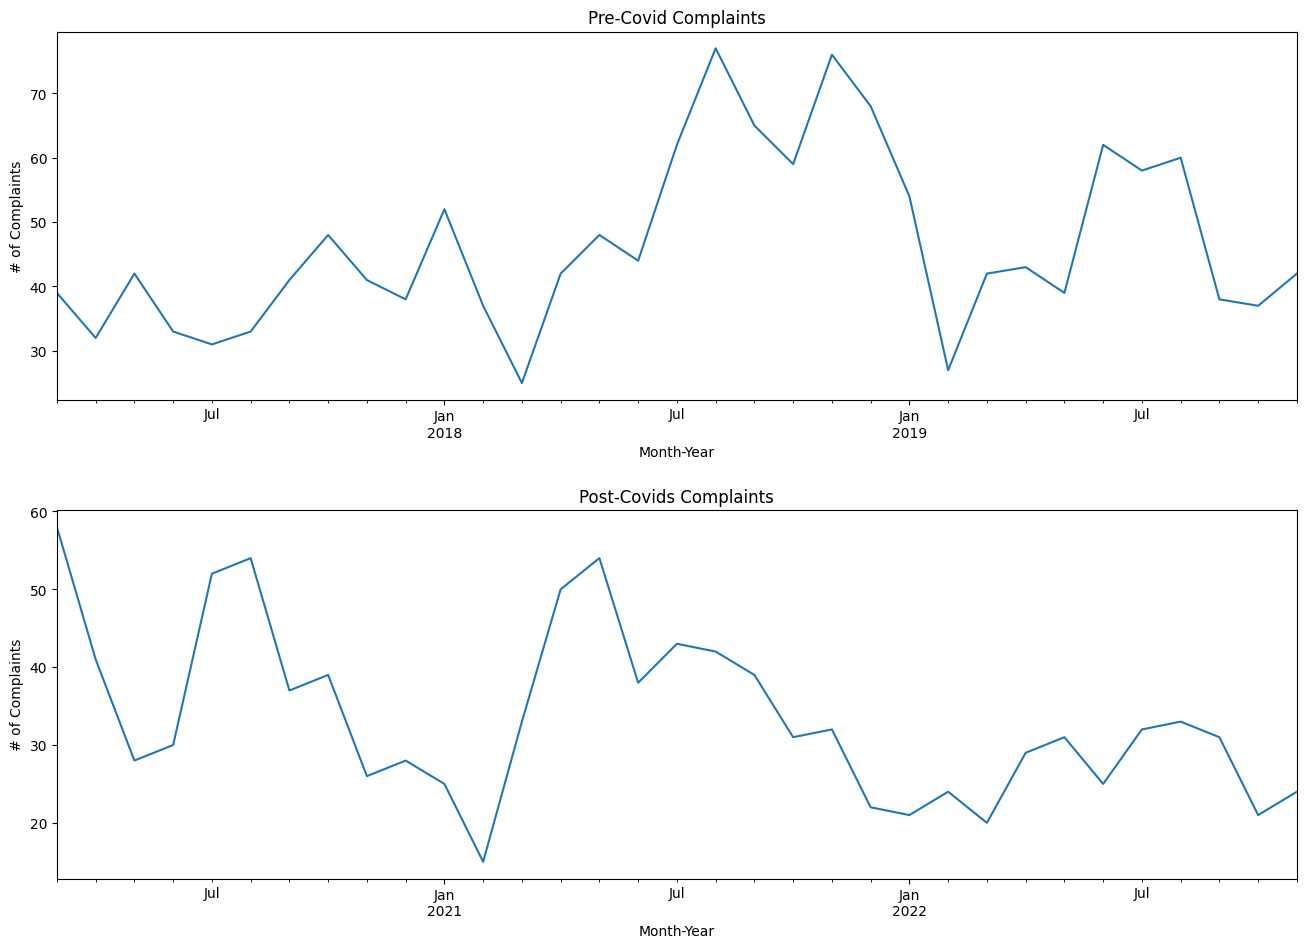

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize =(16,11))    
plt.subplots_adjust(wspace=1, hspace=.3)
pre_covid_dates.plot(ax=axes[0], title='Pre-Covid Complaints', xlabel='Month-Year',ylabel='# of Complaints',legend=False)
post_covid_dates.plot(ax=axes[1], title='Post-Covids Complaints', xlabel='Month-Year',ylabel='# of Complaints',legend=False)


##### Timelines do differ, looks like more complaints came earlier post covid- vs. pre covid. 
##### End of timeline trend looks similar

#### 2. What are the top 5 industries in each period? 


In [30]:
post_covid = complaints_post_covid['NATURE OF COMPLAINT/INQUIRY'].value_counts().head(10).to_frame()

In [31]:
pre_covid = complaints_pre_covid['NATURE OF COMPLAINT/INQUIRY'].value_counts().head(10).to_frame()

In [32]:
pre_covid

,NATURE OF COMPLAINT/INQUIRY
Other - All,408
Quality of Life-Noise - Trade Waste,126
Service - All,124
Information - All,96
Misinformation - All,84
Unlicensed Carter - Trade Waste,84
Licensing - All,67
Quality of Life-Spillage - Trade Waste,65
Unsafe Driving - Trade Waste,56
Containers-Unremoved - Trade Waste,51


In [33]:
post_covid

,NATURE OF COMPLAINT/INQUIRY
Other - All,348
Service - All,121
Licensing - All,109
Quality of Life-Noise - Trade Waste,63
Unlicensed Carter - Trade Waste,63
Information - All,40
Quality of Life-Spillage - Trade Waste,32
Containers-Unremoved - Trade Waste,31
Misinformation - All,27
Unsafe Driving - Trade Waste,26


In [34]:
complaint_nature = pd.merge(pre_covid, post_covid, left_index =True, right_index= True)
complaint_nature.columns = ['Pre-Covid Complaints (3/2017-11/2019)','Post-Covid Complaints (3/2020-11/2022)']

In [35]:
complaint_nature

,Pre-Covid Complaints (3/2017-11/2019),Post-Covid Complaints (3/2020-11/2022)
Other - All,408,348
Quality of Life-Noise - Trade Waste,126,63
Service - All,124,121
Information - All,96,40
Misinformation - All,84,27
Unlicensed Carter - Trade Waste,84,63
Licensing - All,67,109
Quality of Life-Spillage - Trade Waste,65,32
Unsafe Driving - Trade Waste,56,26
Containers-Unremoved - Trade Waste,51,31


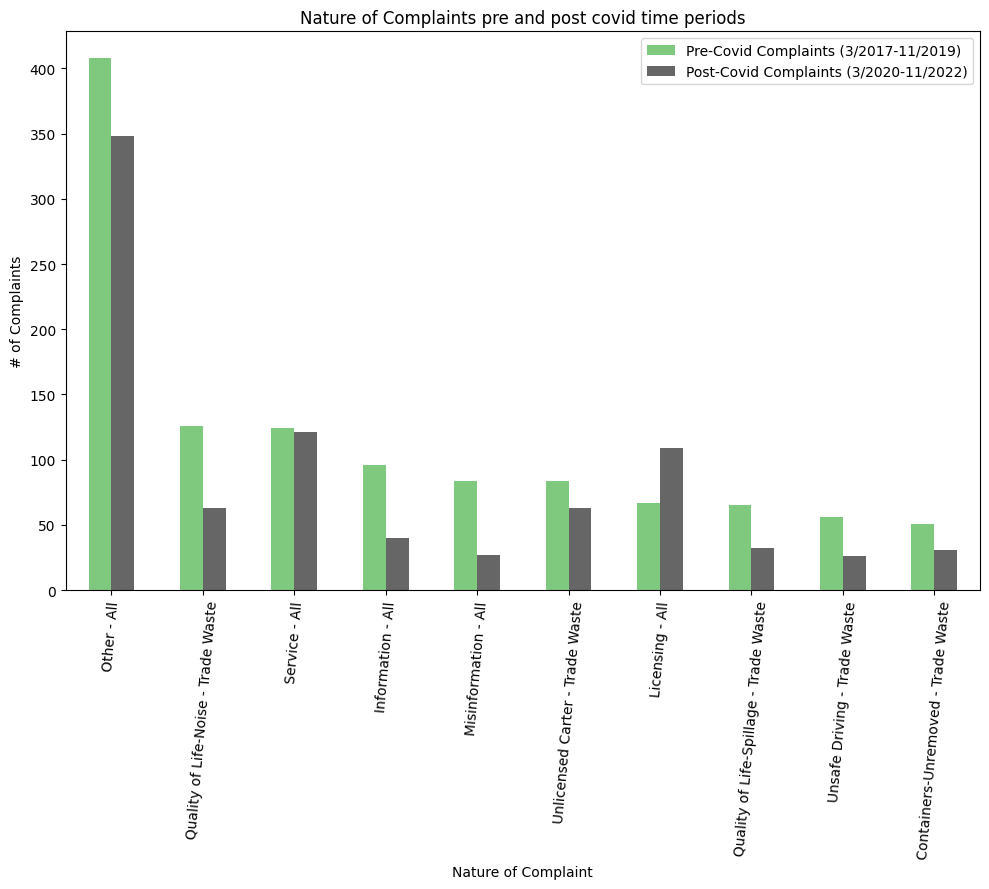

In [36]:
#Plot Bar
complaint_nature.plot.bar(colormap='Accent',figsize =(10,9),rot=85)
plt.xlabel("Nature of Complaint")
plt.ylabel("# of Complaints")
plt.title("Nature of Complaints pre and post covid time periods")
plt.tight_layout()
plt.xticks()
plt.show()


#### Proportianately outside of service and liscensing the decreases per nature are stable. Misinformation is one that is significantly less pre and post covid. 

#### 3. What is the geographic distribution of complaints by city?¶

In [37]:
len(complaints_pre_covid)

1535

In [38]:
len(complaints_post_covid)

1108

<AxesSubplot: title={'center': 'Post-Covid Complaints (3/2020-11/2022) top 6 cities'}, xlabel='City', ylabel='# of Complaints'>

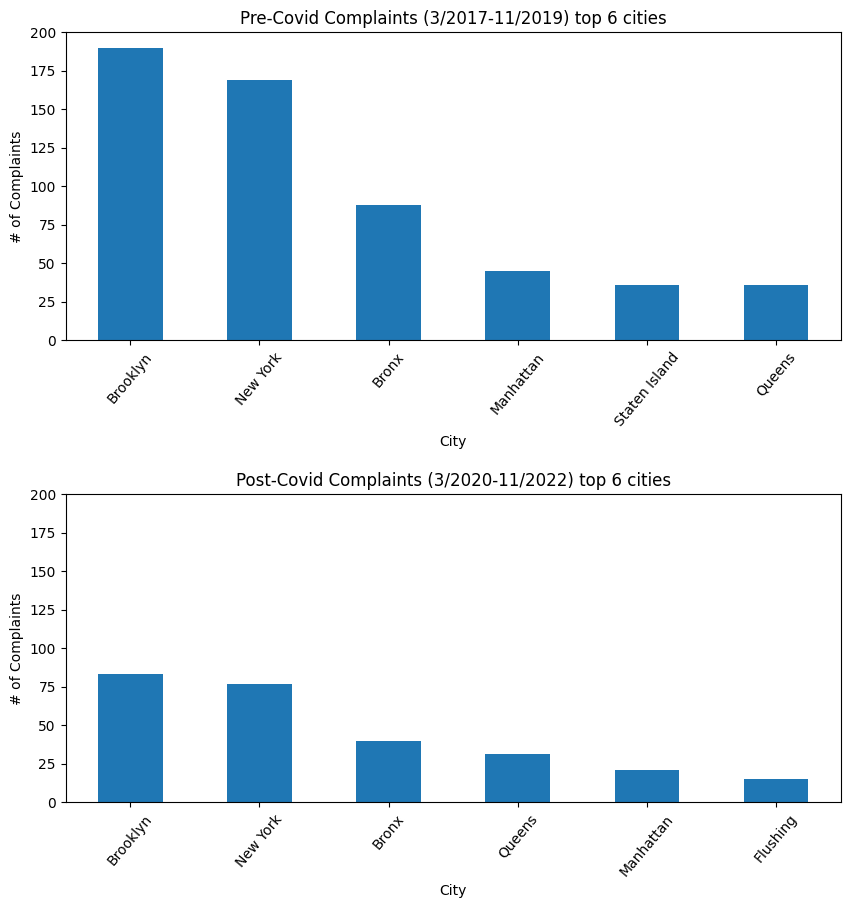

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize =(10,10))
plt.subplots_adjust(wspace=1, hspace=.5)
complaints_pre_covid['COMPLAINT/INQUIRY CITY'].value_counts().head(6).plot.bar(ax=axes[0],rot=50,title ="Pre-Covid Complaints (3/2017-11/2019) top 6 cities",xlabel='City',ylabel='# of Complaints',ylim =(0,200))
complaints_post_covid['COMPLAINT/INQUIRY CITY'].value_counts().head(6).plot.bar(ax=axes[1],rot=50,title ="Post-Covid Complaints (3/2020-11/2022) top 6 cities",xlabel='City',ylabel='# of Complaints',ylim =(0,200))


#### Overall volume of complaints is less "post-covid", Brooklyn, New York, Bronx, Queens, and Manhattan remain stable with slight changes - including the sixth borough shows an interesting insight as Queens is close to the bronx in the post covid peroid with similar overall volume from precovid 

### Learnings from this Pre-Covid and Post-Covid analysis are the following 
#### 1. Overall Complaint volume has decreased (By close to 400) in the same time period from 2017-2019,and 2020-2022 - This could be correlated to lower business during peak pandemic months but is not proven 
####  2. From the timeline graph the spike changes from Jan of the second year (2019), to May 2021 - There is also more early activity in the  post pandemic months which is unexpected. Things from each time peroid at the end are similar 
#### 3. With Complaint volume being less, the city graph remains conistent with a slight variation in outer boroughs (Flushing, Queens) in who makes up the top 6 # of complaints. 

#### Next Steps: A geographical representation with a mapping element for number 3 is an enhancement I would like to explore with this graph, This could show the decline or incline of complaints in certain neighborhoods or geogrophies that may have been impacted by the pandemic